In [1]:
import numpy as np
from matplotlib import pyplot as plt
seed_val = 42
np.random.seed(seed_val)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def sigmoid_derivative(z):
    return z * (1 - z)

In [4]:
def initialize():
  W1 = np.random.randn(2,2)
  W2 = np.random.randn(1,2)
  b1 = np.zeros((2,1))
  b2 = np.zeros((1,1))

  parameters = {"W1" : W1, "b1": b1,
                "W2" : W2, "b2": b2}
  return parameters

In [5]:
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
 
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
 
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

In [6]:
# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
     
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
     
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, sigmoid_derivative(A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
     
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [7]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [8]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

In [9]:
parameters = initialize()
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch))

In [10]:
for i in range(epoch):
    losses[i], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

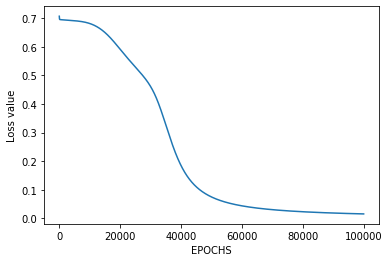

In [11]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [12]:
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[1. 0. 0. 1.]]
